In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_TNDM.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,62.42,64.2500,61.5136,61.62,1022503,2019-04-15,63.7018,2019-04-15,46.1508,2019-04-15,43.6729
1,1,2019-04-12,64.82,65.0772,62.6800,62.79,1178968,2019-04-12,64.0220,2019-04-12,48.7046,2019-04-12,47.8482
2,2,2019-04-11,65.22,65.3699,62.6200,64.50,1450989,2019-04-11,64.2116,2019-04-11,52.6593,2019-04-11,47.4225
3,3,2019-04-10,64.00,65.5300,62.7500,64.57,1303260,2019-04-10,64.1672,2019-04-10,52.8223,2019-04-10,45.7151
4,4,2019-04-09,61.45,65.2411,61.0770,64.15,2416734,2019-04-09,64.1053,2019-04-09,51.9942,2019-04-09,47.3435


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    61.62
1    62.79
2    64.50
3    64.57
4    64.15
Name: close, dtype: float64

In [7]:
len(close)

1348

In [8]:
train = close.loc[:len(close) - int(len(close)*0.15)  -1]
test = close.loc[len(close) - int(len(close)*0.15) :]
print(train.tail())
print(test.head())

1141    12.98
1142    13.42
1143    13.20
1144    13.17
1145    13.56
Name: close, dtype: float64
1146    13.60
1147    13.15
1148    13.27
1149    13.43
1150    13.99
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

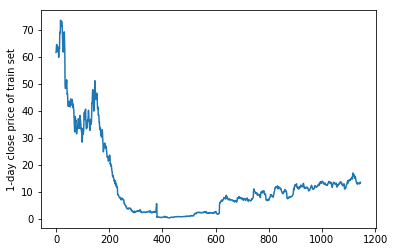

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

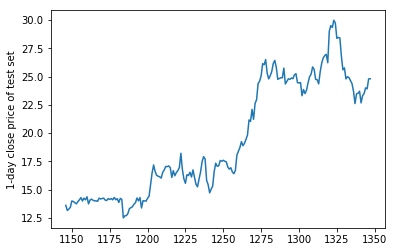

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

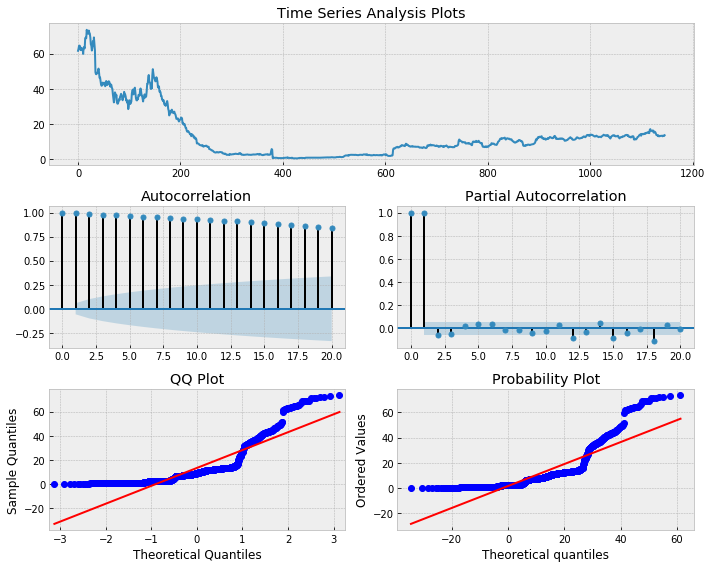

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-4.700615712526456,
 8.392894450229604e-05,
 15,
 1130,
 {'1%': -3.436150192101723,
  '5%': -2.8641011312034057,
  '10%': -2.5681336157882373},
 2865.262550056046)

Text(0,0.5,'Difference in 1-day close price')

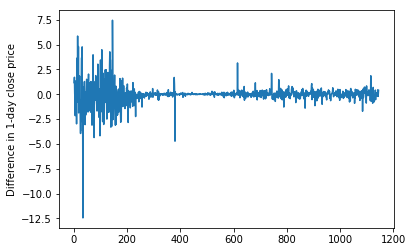

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-7.549542716671267,
 3.2160196312537585e-11,
 14,
 1130,
 {'1%': -3.436150192101723,
  '5%': -2.8641011312034057,
  '10%': -2.5681336157882373},
 2891.9636226553703)

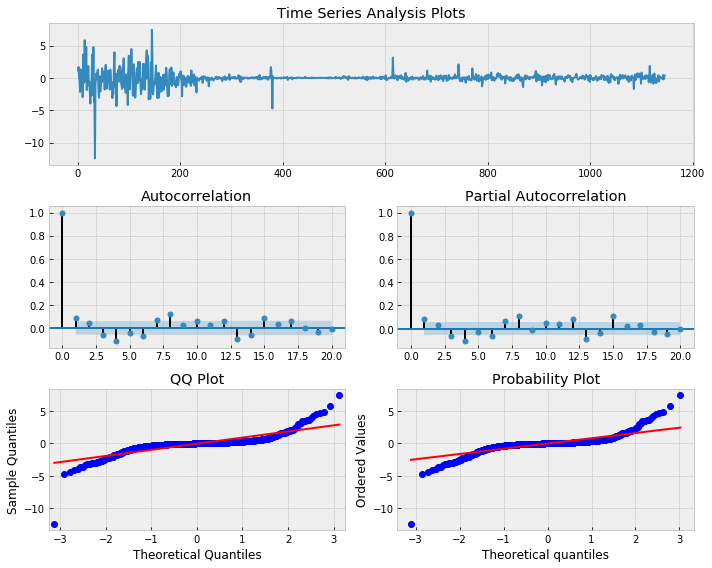

In [15]:
tsplot(train_diff, lags=20)

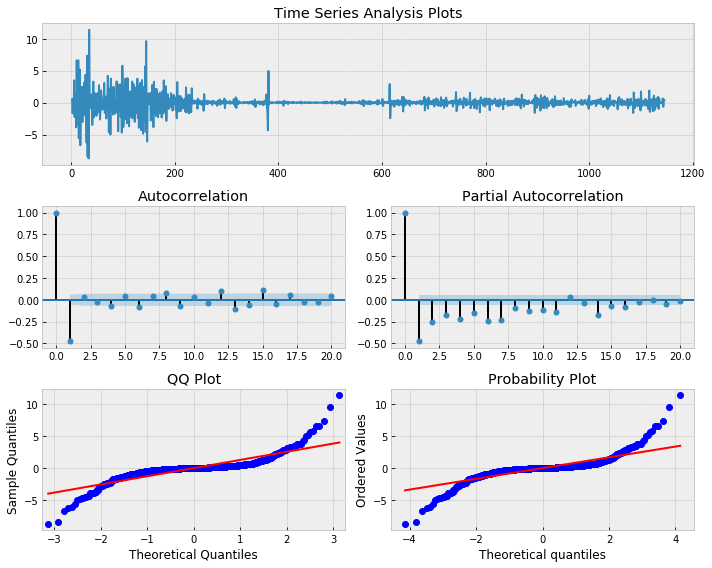

In [25]:
tsplot(train.diff().diff().dropna(), lags=20)

### Fit Model

In [16]:
arima300 = smt.ARIMA(train, (3,0,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima300_fit = arima300.fit() #change model name*2
arima300_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 1146
Model:                     ARMA(3, 0)   Log Likelihood               -1562.204
Method:                       css-mle   S.D. of innovations              0.943
Date:                Wed, 17 Apr 2019   AIC                           3134.408
Time:                        17:00:24   BIC                           3159.628
Sample:                             0   HQIC                          3143.930
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.3262     19.215      1.474      0.141      -9.334      65.987
ar.L1.close     1.0857      0.029     37.632      0.000       1.029       1.142
ar.L2.close    -0.0523      0.043     -1.215      0.225      -0.137       0.032
ar.L3.close    -0.0344      0.030     -1.162      0.245      -0.092       0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           +0.0000j            1.0011            0.0000
AR.2            4.2743           +0.0000j            4.2743            0.0000
AR.3           -6.7958           +0.0000j            6.7958            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
arima200 = smt.ARIMA(train, (2,0,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima200_fit = arima200.fit() #change model name*2
arima200_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 1146
Model:                     ARMA(2, 0)   Log Likelihood               -1562.879
Method:                       css-mle   S.D. of innovations              0.944
Date:                Wed, 17 Apr 2019   AIC                           3133.758
Time:                        17:15:24   BIC                           3153.935
Sample:                             0   HQIC                          3141.376
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.8531     19.655      1.468      0.142      -9.671      67.377
ar.L1.close     1.0887      0.029     38.061      0.000       1.033       1.145
ar.L2.close    -0.0896      0.029     -3.131      0.002      -0.146      -0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
AR.2           11.1464           +0.0000j           11.1464            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1145
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1557.605
Method:                       css-mle   S.D. of innovations              0.943
Date:                Wed, 17 Apr 2019   AIC                           3121.211
Time:                        17:12:23   BIC                           3136.340
Sample:                             1   HQIC                          3126.923
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0418      0.031     -1.370      0.171      -0.102       0.018
ar.L1.D.close     0.0872      0.029      2.961      0.003       0.029       0.145
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.4673           +0.0000j           11.4673            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1145
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1557.928
Method:                       css-mle   S.D. of innovations              0.943
Date:                Wed, 17 Apr 2019   AIC                           3121.856
Time:                        17:13:52   BIC                           3136.985
Sample:                             1   HQIC                          3127.568
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0419      0.030     -1.390      0.165      -0.101       0.017
ma.L1.D.close     0.0805      0.028      2.866      0.004       0.025       0.136
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -12.4180           +0.0000j           12.4180            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
arima111 = smt.ARIMA(train, (1,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima111_fit = arima111.fit() #change model name*2
arima111_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1145
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1557.398
Method:                       css-mle   S.D. of innovations              0.943
Date:                Wed, 17 Apr 2019   AIC                           3122.796
Time:                        17:01:33   BIC                           3142.969
Sample:                             1   HQIC                          3130.413
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0418      0.031     -1.350      0.177      -0.102       0.019
ar.L1.D.close     0.2094      0.178      1.178      0.239      -0.139       0.558
ma.L1.D.close    -0.1218      0.179     -0.681      0.496      -0.472       0.228
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7755           +0.0000j            4.7755            0.0000
MA.1            8.2125           +0.0000j            8.2125            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

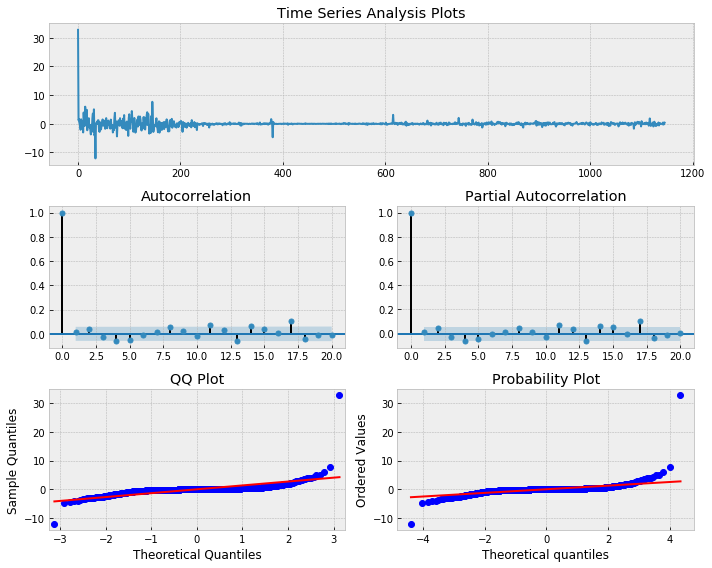

In [42]:
tsplot(arima200_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [18]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima300_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([8.76329821]), array([0.11888609]))

In [39]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima200_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([9.80097924]), array([0.08107486]))

### Forecasting

In [28]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima300_fit.forecast(steps=num_steps)   #change model name

In [29]:
arima300_fit.forecast(steps=num_steps)   #change model name

(array([13.60668152, 13.63800521, 13.65616149, 13.6726312 , 13.68848639]),
 array([0.94312425, 1.39212924, 1.75124144, 2.05099113, 2.31255445]),
 array([[11.75819195, 15.45517109],
        [10.90948203, 16.36652839],
        [10.22379133, 17.08853165],
        [ 9.65276245, 17.69249996],
        [ 9.15596296, 18.22100982]]))

In [30]:
arima300_fit.forecast(steps=num_steps)[0][4]    #change model name

13.68848639217623

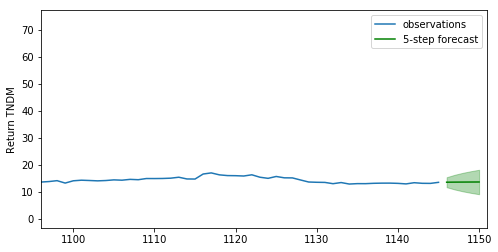

In [31]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return TNDM')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [40]:
pred = []
for i in range(  int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -   int(len(close)*0.15)  -5 + i]
    moving_arima200 = smt.ARIMA(moving_train, (2,0,0))   #change model parameters  & model name
    moving_arima200_fit = moving_arima200.fit()   #change model name*2
    
    pred.append(moving_arima200_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

202

In [33]:
#(3,0,0)  
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.965842341528084
MAE = 1.0768174465909781
RMSE = 1.435831306697395
Scaled MAE = 0.061567607009204
Scaled RMSE = 0.08209441433375612


In [41]:
#(2,0,0)   final one
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9659180073805236
MAE = 1.0739194608974434
RMSE = 1.4342401022949565
Scaled MAE = 0.06140191314450791
Scaled RMSE = 0.08200343638050064
